In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os.path import exists
import json
import scipy.stats as stats
import math
import sklearn.linear_model as lm

import sys
sys.path.insert(0, "../util/")
import util as util

In [2]:
fullDatingDatabase = pd.read_csv("../data/encoded-SpeedDatingData.csv")

In [3]:
columnList = ["iid","gender","condtn","wave","round","order","pid","int_corr","age_o","race_o","pf_o_att","pf_o_sin","pf_o_int","pf_o_fun","pf_o_amb","pf_o_sha","match","attr_o",
              "sinc_o","intel_o","amb_o","fun_o","shar_o","like_o","prob_o","age","field_cd","undergra","mn_sat","tuition","race","imprace","imprelig","from","zipcode",
              "income","goal","date","go_out","career_c","sports","tvsports","exercise","dining","museums","art","hiking","gaming","clubbing","reading","tv","theater",
              "movies","concerts","music","shopping","yoga","exphappy","expnum","attr1_1","sinc1_1","intel1_1","fun1_1","shar1_1","attr4_1","sinc4_1","intel4_1","fun4_1","shar4_1",
              "attr2_1","sinc2_1","intel2_1","fun2_1","shar2_1","attr3_1","sinc3_1","intel3_1","fun3_1","attr5_1","sinc5_1","intel5_1","fun5_1","dec","attr",
              "sinc","intel","fun","amb","like","prob","met","match_es","attr1_s","sinc1_s","intel1_s","fun1_s","shar1_s","attr3_s","sinc3_s","intel3_s","fun3_s"]
nonBinaryCategoricalList = ["condtn","race_o","wave","field_cd","undergra","race","from","zipcode","goal","date","go_out","career_c"]
stringToFloatList = ["tuition","mn_sat","income"]
partnerList = ["condtn","field_cd","undergra","mn_sat","tuition","imprace","imprelig","from",
               "zipcode","income","goal","date","go_out","career_c","sports","tvsports","exercise","dining","museums","art","hiking","gaming","clubbing","reading","tv",
               "theater","movies","concerts","music","shopping","yoga","exphappy","expnum","attr4_1","sinc4_1","intel4_1","fun4_1",
               "shar4_1","attr2_1","sinc2_1","intel2_1","fun2_1","shar2_1","attr3_1","sinc3_1","intel3_1","fun3_1","attr5_1","sinc5_1","intel5_1","fun5_1","match_es","attr1_s",
               "sinc1_s","intel1_s","fun1_s","shar1_s","attr3_s","sinc3_s","intel3_s","fun3_s"]
pointDistributionList = []

In [4]:
blindDateData = fullDatingDatabase[columnList]
for catCol in nonBinaryCategoricalList:
    blindDateData[catCol] = blindDateData[catCol].apply(str)
    blindDateData[catCol] = blindDateData[catCol].fillna('nan')
for stringToFloatCol in stringToFloatList:
    blindDateData[stringToFloatCol] = blindDateData[stringToFloatCol].str.replace(',', '').astype(float)

<ipython-input-4-62b0c0ed48d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blindDateData[catCol] = blindDateData[catCol].apply(str)
<ipython-input-4-62b0c0ed48d4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blindDateData[catCol] = blindDateData[catCol].fillna('nan')
<ipython-input-4-62b0c0ed48d4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [5]:
blindDateDataWave69 = blindDateData[(blindDateData['wave'].astype(int) >= 6) & (blindDateData['wave'].astype(int) <= 9)]
blindDateDataWaveNot69 = blindDateData[(blindDateData['wave'].astype(int) < 6) | (blindDateData['wave'].astype(int) > 9)]

iid int64
0.0% of data is nan. 0 out of 8378
283.675936977799 +/- 158.58336657825632


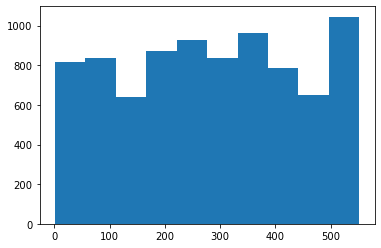



gender int64
0.0% of data is nan. 0 out of 8378
[0, 1]


condtn object
0.0% of data is nan. 0 out of 8378
['2', '1']


wave object
0.0% of data is nan. 0 out of 8378
data varries across 21 values


round int64
0.0% of data is nan. 0 out of 8378
[5, 6, 7, 8, 9, 10, 11, 14, 15, 16, 18, 19, 20, 21, 22]


order int64
0.0% of data is nan. 0 out of 8378
8.927667701121987 +/- 5.477009439597783


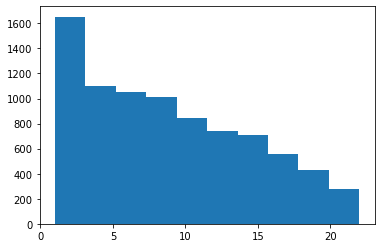



pid float64
0.11936022917164% of data is nan. 10 out of 8378
283.86376673040155 +/- 158.58489888970877


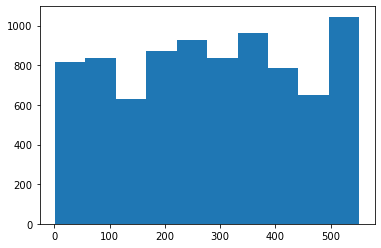



int_corr float64
1.885891620911912% of data is nan. 158 out of 8378
0.19600973236009664 +/- 0.3035392315995035


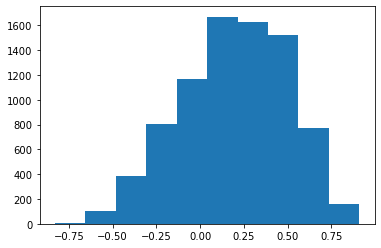



age_o float64
1.2413463833850562% of data is nan. 104 out of 8378
26.36499879139473 +/- 3.5636483364286016


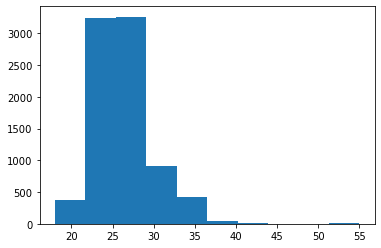



race_o object
0.871329672952972% of data is nan. 73 out of 8378
['3.0', '1.0', '6.0', '2.0', 'nan', '4.0']


pf_o_att float64
1.062306039627596% of data is nan. 89 out of 8378
22.49534684521648 +/- 12.569801839920526


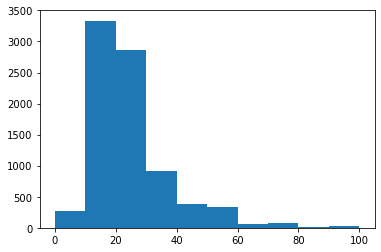



pf_o_sin float64
1.062306039627596% of data is nan. 89 out of 8378
17.396866932078645 +/- 7.044002879087815


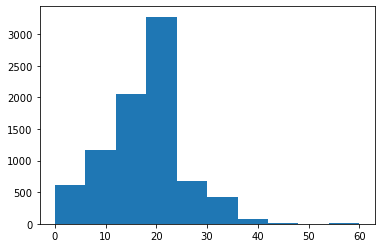



pf_o_int float64
1.062306039627596% of data is nan. 89 out of 8378
20.270758837012853 +/- 6.782895408058518


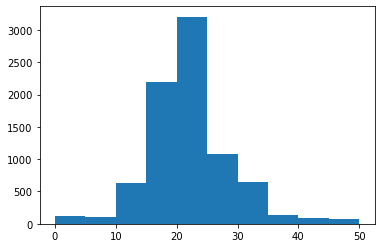



pf_o_fun float64
1.1697302458820722% of data is nan. 98 out of 8378
17.45971376811598 +/- 6.085525745939858


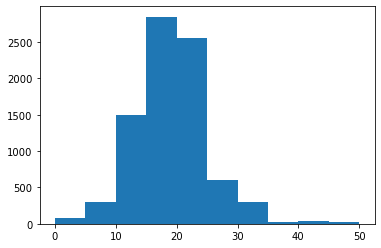



pf_o_amb float64
1.277154452136548% of data is nan. 107 out of 8378
10.685375408052264 +/- 6.126543670040534


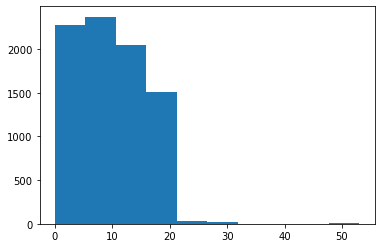



pf_o_sha float64
1.5397469563141561% of data is nan. 129 out of 8378
11.845930415807954 +/- 6.362745543712514


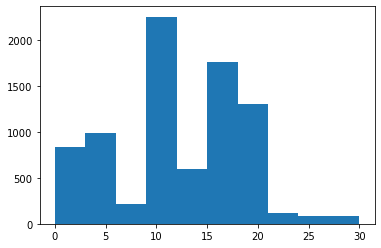



match int64
0.0% of data is nan. 0 out of 8378
[0, 1]


attr_o float64
2.5304368584387684% of data is nan. 212 out of 8378
6.190411462160177 +/- 1.9503054298615539


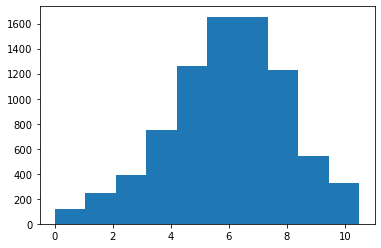



sinc_o float64
3.4256385772260685% of data is nan. 287 out of 8378
7.175256457792609 +/- 1.7405754111172975


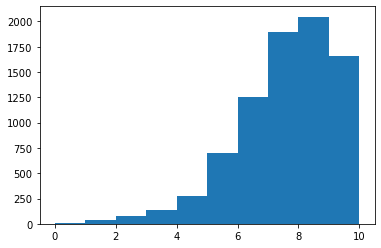



intel_o float64
3.6524230126521844% of data is nan. 306 out of 8378
7.369301288404361 +/- 1.550500930611773


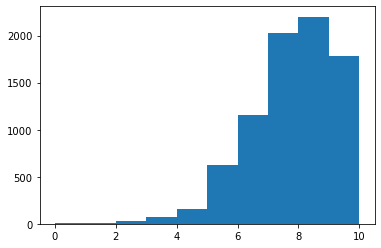



amb_o float64
8.617808546192409% of data is nan. 722 out of 8378
6.778409090909091 +/- 1.7940798581056119


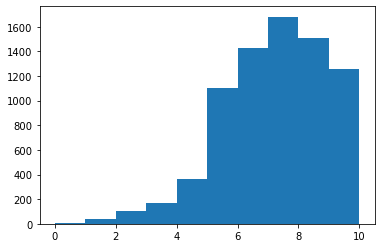



fun_o float64
4.296968250179041% of data is nan. 360 out of 8378
6.400598653030681 +/- 1.9540779148364582


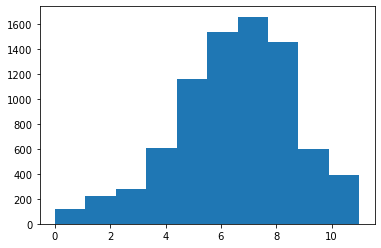



shar_o float64
12.843160658868465% of data is nan. 1076 out of 8378
5.474869898657902 +/- 2.1561631824645717


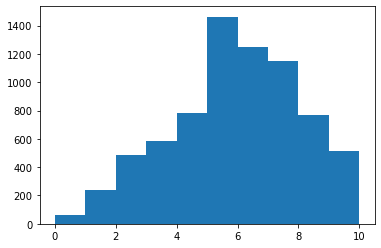



like_o float64
2.9840057292910003% of data is nan. 250 out of 8378
6.134498031496062 +/- 1.8412579743245776


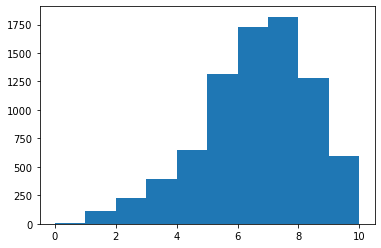



prob_o float64
3.7956552876581524% of data is nan. 318 out of 8378
5.208250620347394 +/- 2.1293539684227265


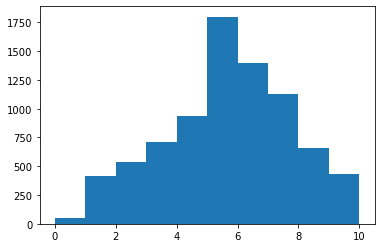



age float64
1.13392217713058% of data is nan. 95 out of 8378
26.358927924664975 +/- 3.566762556101457


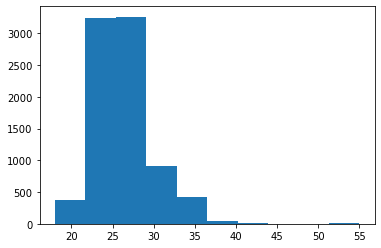



field_cd object
0.978753879207448% of data is nan. 82 out of 8378
['9.0', '5.0', '6.0', '14.0', '16.0', '11.0', '3.0', '10.0', 'nan', '7.0', '17.0', '2.0', '4.0', '12.0', '13.0', '15.0', '18.0', '1.0', '8.0']


undergra object
41.3463833850561% of data is nan. 3464 out of 8378
data varries across 242 values


mn_sat float64
62.60444020052518% of data is nan. 5245 out of 8378
1299.6552824768592 +/- 119.79802034467889


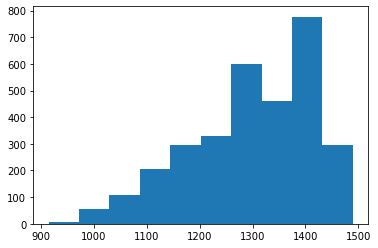



tuition float64
57.233229887801386% of data is nan. 4795 out of 8378
21174.926039631595 +/- 6748.661161666493


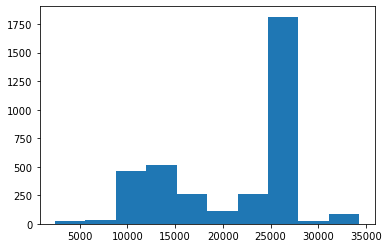



race object
0.751969443781332% of data is nan. 63 out of 8378
['3.0', '1.0', '6.0', '2.0', 'nan', '4.0']


imprace float64
0.942945810455956% of data is nan. 79 out of 8378
3.7847933485962164 +/- 2.8457077597185734


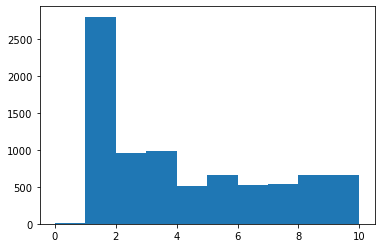



imprelig float64
0.942945810455956% of data is nan. 79 out of 8378
3.651644776479094 +/- 2.8052370077510074


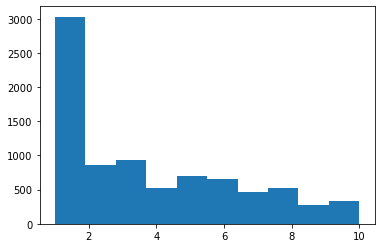



from object
0.942945810455956% of data is nan. 79 out of 8378
data varries across 270 values


zipcode object
12.699928383862497% of data is nan. 1064 out of 8378
data varries across 410 values


income float64
48.92575793745524% of data is nan. 4099 out of 8378
44887.606450105166 +/- 17206.9209616554


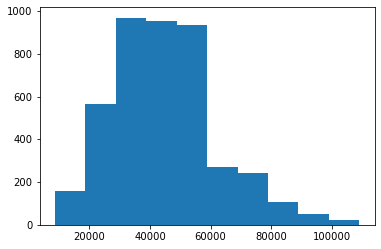



goal object
0.942945810455956% of data is nan. 79 out of 8378
['3.0', '1.0', '6.0', '5.0', '2.0', 'nan', '4.0']


date object
1.157794222964908% of data is nan. 97 out of 8378
['3.0', '1.0', '6.0', '5.0', '2.0', 'nan', '4.0', '7.0']


go_out object
0.942945810455956% of data is nan. 79 out of 8378
['3.0', '1.0', '5.0', '6.0', '2.0', 'nan', '4.0', '7.0']


career_c object
1.647171162568632% of data is nan. 138 out of 8378
['3.0', '11.0', '12.0', '1.0', '9.0', '8.0', '15.0', '6.0', '5.0', '17.0', '2.0', '10.0', '14.0', 'nan', '4.0', '13.0', '16.0', '7.0']


sports float64
0.942945810455956% of data is nan. 79 out of 8378
6.425231955657308 +/- 2.6190238915809467


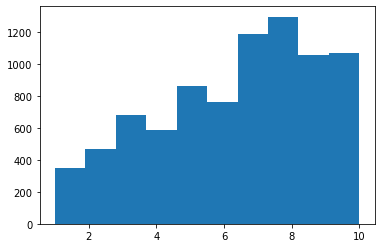



tvsports float64
0.942945810455956% of data is nan. 79 out of 8378
4.575491023014821 +/- 2.801874498954512


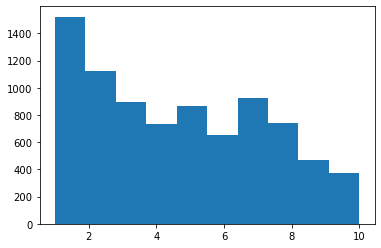



exercise float64
0.942945810455956% of data is nan. 79 out of 8378
6.245812748523918 +/- 2.4188577344641433


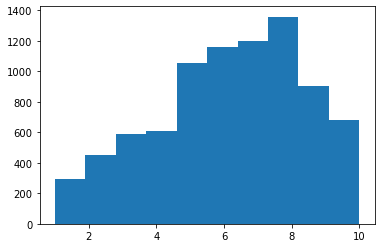



dining float64
0.942945810455956% of data is nan. 79 out of 8378
7.783829377033378 +/- 1.754867551472175


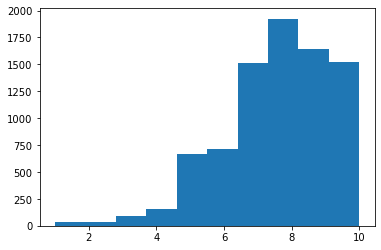



museums float64
0.942945810455956% of data is nan. 79 out of 8378
6.985781419448126 +/- 2.0522319768259374


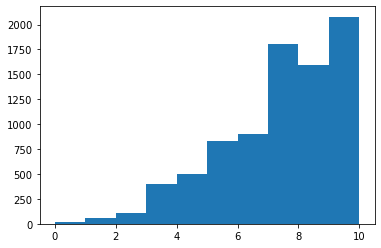



art float64
0.942945810455956% of data is nan. 79 out of 8378
6.714543920954332 +/- 2.2634071920946868


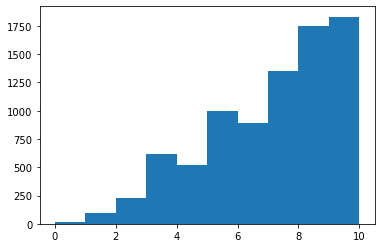



hiking float64
0.942945810455956% of data is nan. 79 out of 8378
5.737076756235691 +/- 2.57020728180663


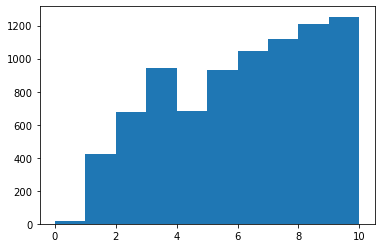



gaming float64
0.942945810455956% of data is nan. 79 out of 8378
3.881190504880106 +/- 2.6205073535111496


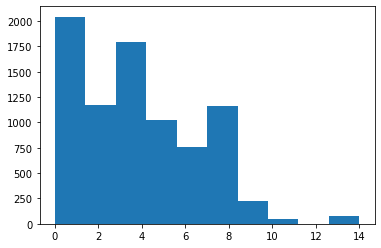



clubbing float64
0.942945810455956% of data is nan. 79 out of 8378
5.745993493191951 +/- 2.5022177264764074


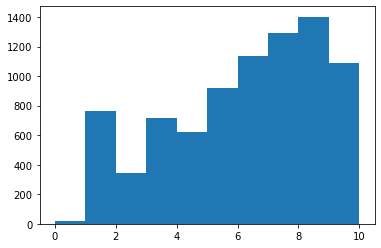



reading float64
0.942945810455956% of data is nan. 79 out of 8378
7.678515483793228 +/- 2.0065654862740234


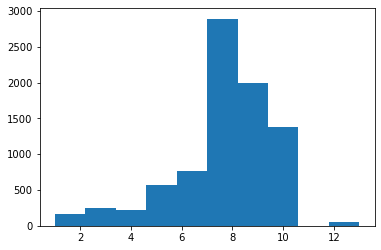



tv float64
0.942945810455956% of data is nan. 79 out of 8378
5.304133028075672 +/- 2.5291353179282727


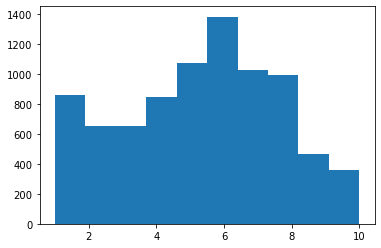



theater float64
0.942945810455956% of data is nan. 79 out of 8378
6.776117604530667 +/- 2.2351523039360486


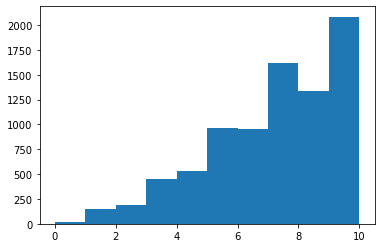



movies float64
0.942945810455956% of data is nan. 79 out of 8378
7.919628870948307 +/- 1.700927414112487


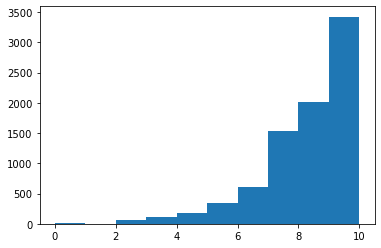



concerts float64
0.942945810455956% of data is nan. 79 out of 8378
6.8254006506808045 +/- 2.156282629294368


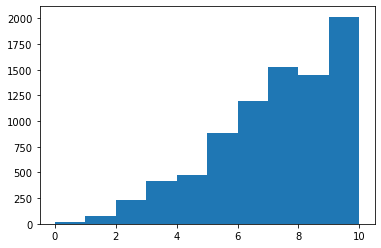



music float64
0.942945810455956% of data is nan. 79 out of 8378
7.851066393541391 +/- 1.791826803868474


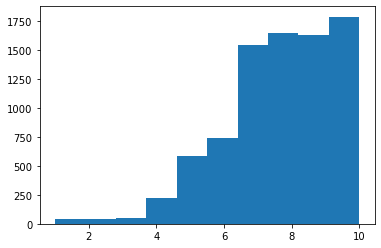



shopping float64
0.942945810455956% of data is nan. 79 out of 8378
5.631280877214122 +/- 2.6089127203843248


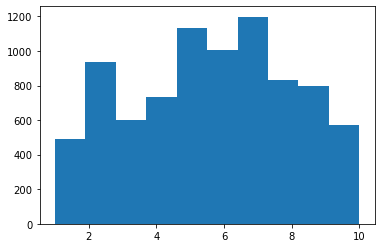



yoga float64
0.942945810455956% of data is nan. 79 out of 8378
4.339197493673937 +/- 2.717611679171458


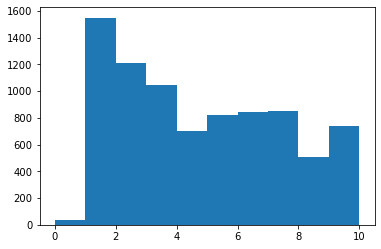



exphappy float64
1.205538314633564% of data is nan. 101 out of 8378
5.534130723692159 +/- 1.7340590702677485


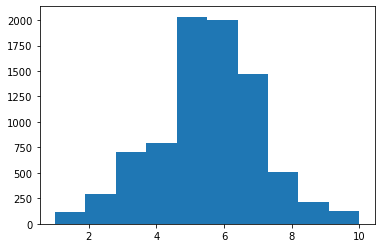



expnum float64
78.5151587491048% of data is nan. 6578 out of 8378
5.570555555555556 +/- 4.7625694227632485


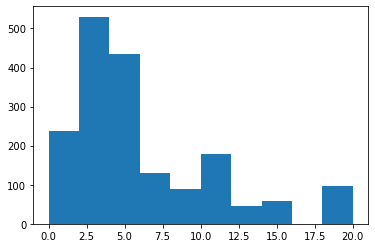



attr1_1 float64
0.942945810455956% of data is nan. 79 out of 8378
16.158304431599127 +/- 3.5153822761350955


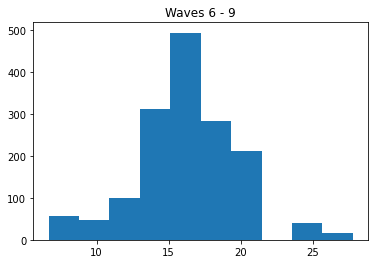

23.982564520913655 +/- 13.44275396534831


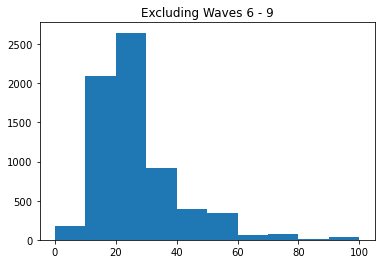



sinc1_1 float64
0.942945810455956% of data is nan. 79 out of 8378
17.82193962748874 +/- 2.7536195789462035


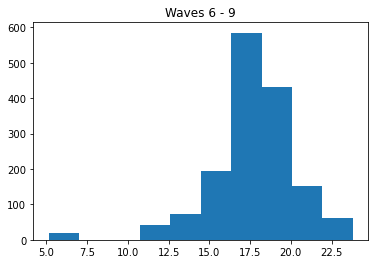

17.298111836250367 +/- 7.702178131521687


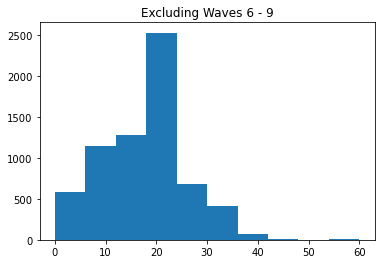



intel1_1 float64
0.942945810455956% of data is nan. 79 out of 8378
18.99088631984584 +/- 1.9930042779629313


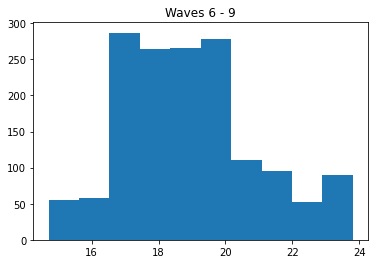

20.55999851676056 +/- 7.433519980453642


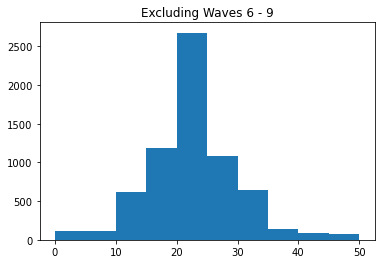



fun1_1 float64
1.062306039627596% of data is nan. 89 out of 8378
17.910327552986374 +/- 2.4401984480580396


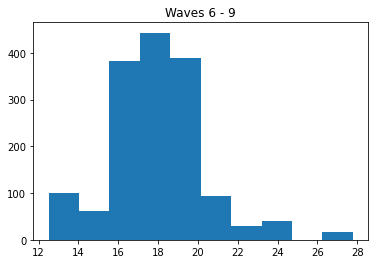

17.352205882352926 +/- 6.645361596234639


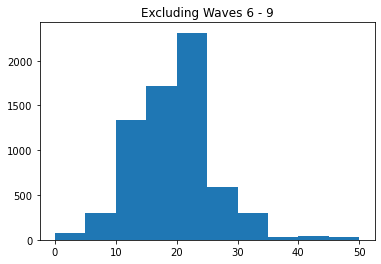



shar1_1 float64
1.4442587729768441% of data is nan. 121 out of 8378
14.386531791907528 +/- 3.9469620506280454


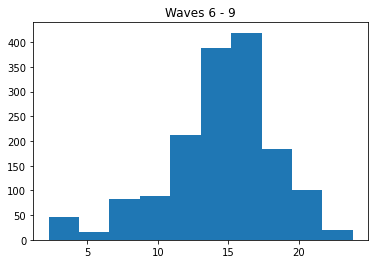

11.25451492537312 +/- 6.664553351303517


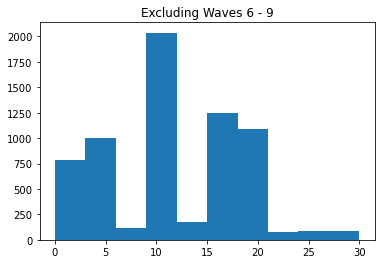



attr4_1 float64
22.547147290522798% of data is nan. 1889 out of 8378
8.638407193320488 +/- 1.1414776564859712


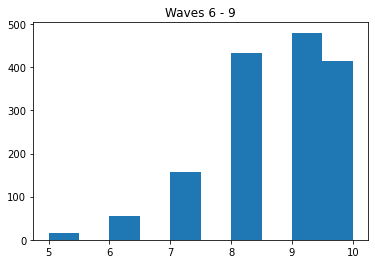

31.999797242497973 +/- 14.76713726807434


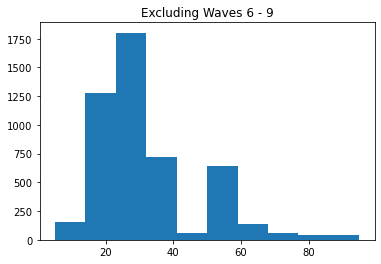



sinc4_1 float64
22.547147290522798% of data is nan. 1889 out of 8378
7.03082851637765 +/- 1.7302911904092577


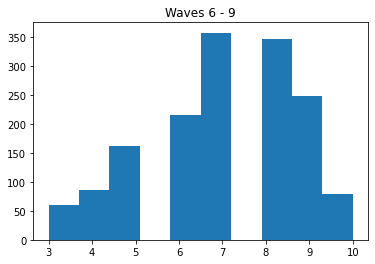

12.347120843471208 +/- 7.114780618404089


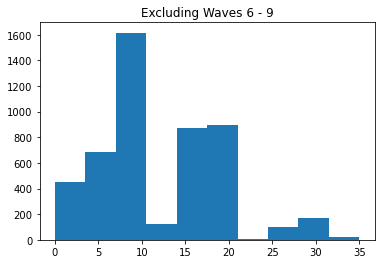



intel4_1 float64
22.547147290522798% of data is nan. 1889 out of 8378
6.872832369942197 +/- 1.7891455086683161


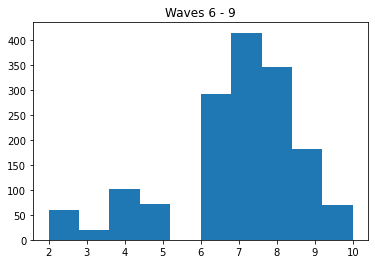

14.45579886455799 +/- 6.675540429269296


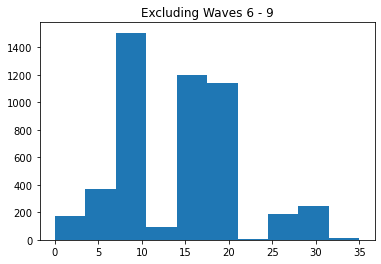



fun4_1 float64
22.547147290522798% of data is nan. 1889 out of 8378
8.077713551701992 +/- 1.3842663133869642


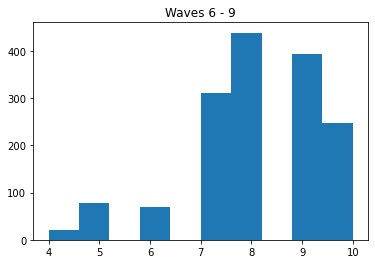

17.931062449310623 +/- 6.8377873527714845


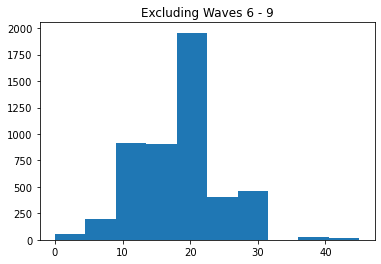



shar4_1 float64
22.809739794700405% of data is nan. 1911 out of 8378
6.886962106615286 +/- 1.918671839178134


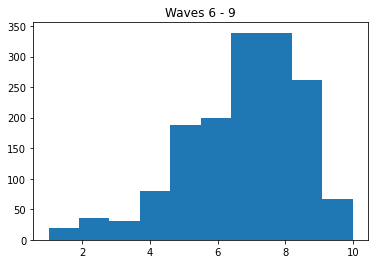

12.323828920570264 +/- 6.331558699928738


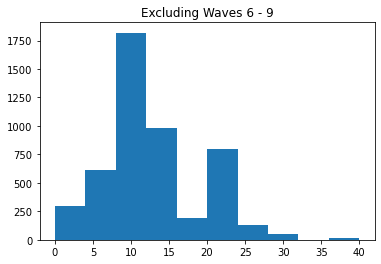



attr2_1 float64
0.942945810455956% of data is nan. 79 out of 8378
19.315883108542053 +/- 4.463157889745285


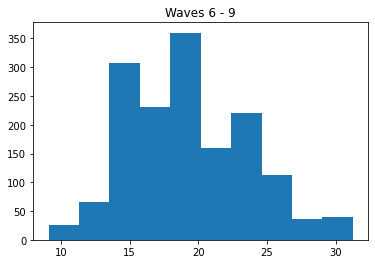

32.913230495401955 +/- 16.904472739823994


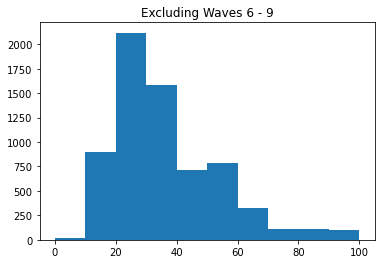



sinc2_1 float64
0.942945810455956% of data is nan. 79 out of 8378
16.20832369942194 +/- 3.150198500790097


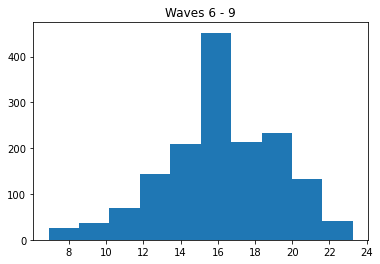

12.59596558884604 +/- 7.428254577486065


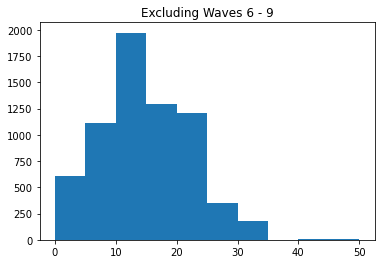



intel2_1 float64
0.942945810455956% of data is nan. 79 out of 8378
15.823236994219615 +/- 2.7934008358607216


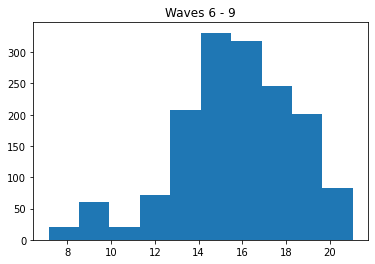

14.09210916641946 +/- 6.776901266361931


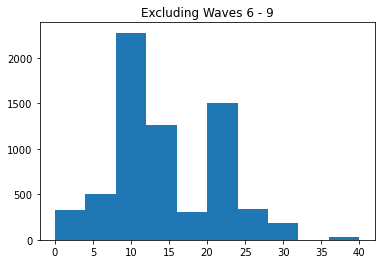



fun2_1 float64
0.942945810455956% of data is nan. 79 out of 8378
18.73816313423239 +/- 2.929036593167734


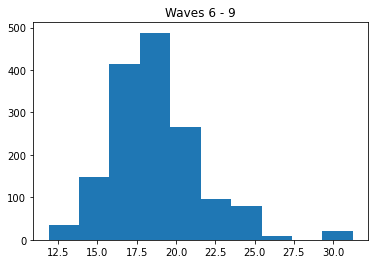

18.349747849302876 +/- 7.159232175045401


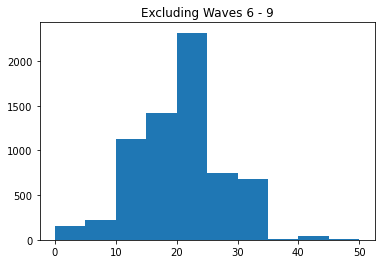



shar2_1 float64
1.062306039627596% of data is nan. 89 out of 8378
15.060745022479132 +/- 2.9407057561625685


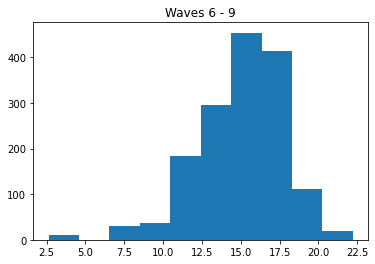

11.11333927510398 +/- 6.473613311830579


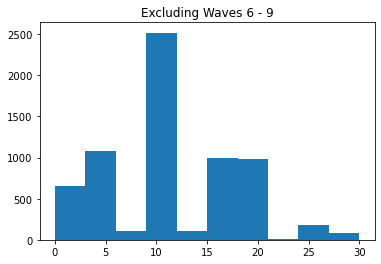



attr3_1 float64
1.25328240630222% of data is nan. 105 out of 8378
7.084733470325154 +/- 1.3957833119192697


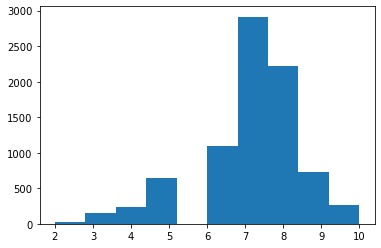



sinc3_1 float64
1.25328240630222% of data is nan. 105 out of 8378
8.294935331802249 +/- 1.407459652324343


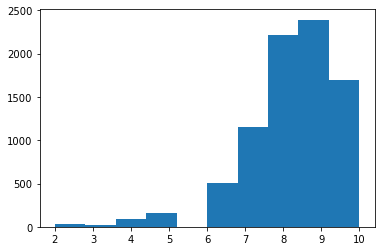



intel3_1 float64
1.25328240630222% of data is nan. 105 out of 8378
8.403964704460293 +/- 1.076608034285945


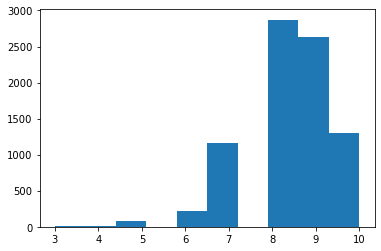



fun3_1 float64
1.25328240630222% of data is nan. 105 out of 8378
7.704460292517829 +/- 1.564320715415435


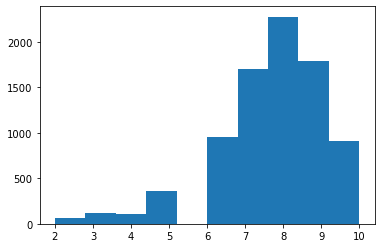



attr5_1 float64
41.44187156839341% of data is nan. 3472 out of 8378
6.941907867916837 +/- 1.4986534045549007


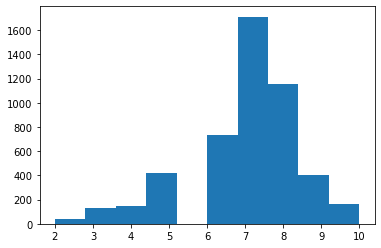



sinc5_1 float64
41.44187156839341% of data is nan. 3472 out of 8378
7.927231960864248 +/- 1.6270535090496154


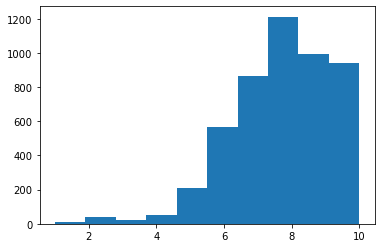



intel5_1 float64
41.44187156839341% of data is nan. 3472 out of 8378
8.284345699143906 +/- 1.2836569947863388


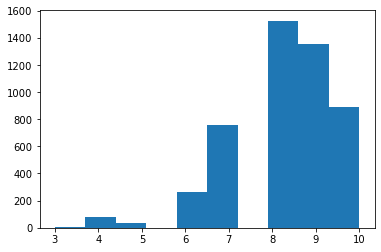



fun5_1 float64
41.44187156839341% of data is nan. 3472 out of 8378
7.426212800652262 +/- 1.7791285726012895


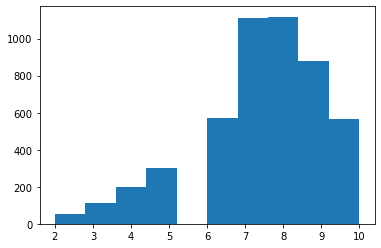



dec int64
0.0% of data is nan. 0 out of 8378
[0, 1]


attr float64
2.411076629267128% of data is nan. 202 out of 8378
6.189995107632094 +/- 1.9501688658885794


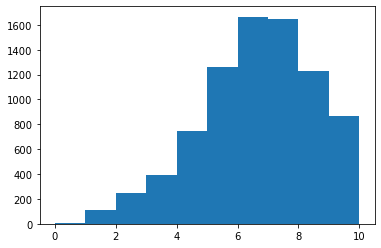



sinc float64
3.306278348054428% of data is nan. 277 out of 8378
7.175163560054314 +/- 1.7403151023143852


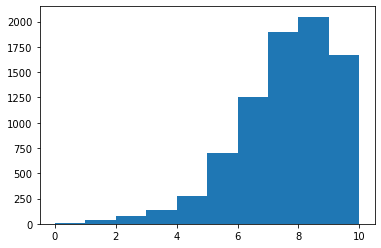



intel float64
3.533062783480544% of data is nan. 296 out of 8378
7.368596881959911 +/- 1.550452903507413


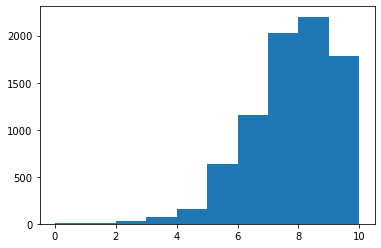



fun float64
4.1776080210074005% of data is nan. 350 out of 8378
6.400597907324364 +/- 1.9537022359650353


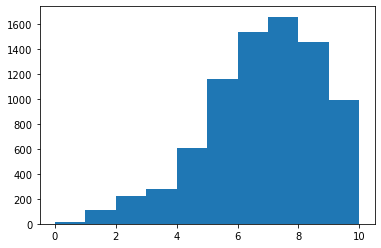



amb float64
8.498448317020769% of data is nan. 712 out of 8378
6.777524132533264 +/- 1.7940547394361774


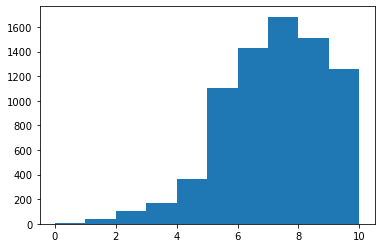



like float64
2.86464550011936% of data is nan. 240 out of 8378
6.134086999262718 +/- 1.8412851797021372


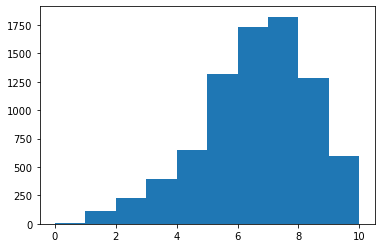



prob float64
3.6882310814036763% of data is nan. 309 out of 8378
5.207522617424712 +/- 2.129564809713715


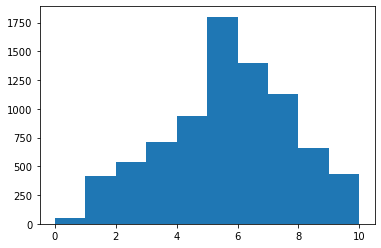



met float64
4.4760085939365% of data is nan. 375 out of 8378
0.0    4047
2.0    3597
1.0     351
7.0       3
5.0       2
6.0       1
8.0       1
3.0       1
Name: met, dtype: int64


match_es float64
14.000954881833373% of data is nan. 1173 out of 8378
3.20781401804303 +/- 2.4448131496836667


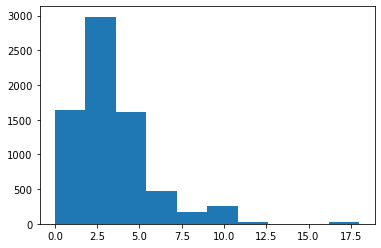



attr1_s float64
51.110050131296255% of data is nan. 4282 out of 8378
20.791623535156212 +/- 12.968524460860335


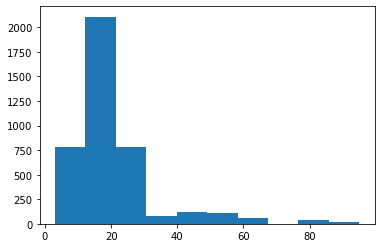



sinc1_s float64
51.110050131296255% of data is nan. 4282 out of 8378
15.43425537109375 +/- 6.915322272432092


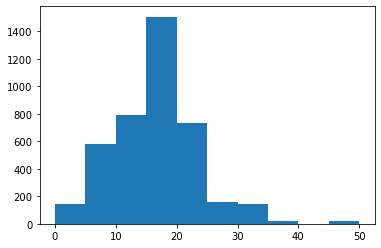



intel1_s float64
51.110050131296255% of data is nan. 4282 out of 8378
17.243708496093767 +/- 6.5964198334980635


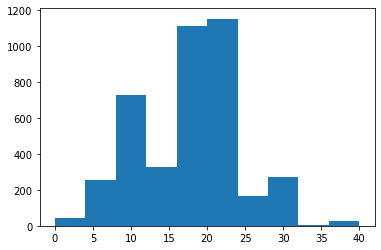



fun1_s float64
51.110050131296255% of data is nan. 4282 out of 8378
15.260869140624976 +/- 5.356969199109649


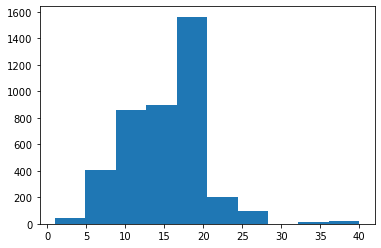



shar1_s float64
51.110050131296255% of data is nan. 4282 out of 8378
12.45792480468749 +/- 5.921788516437912


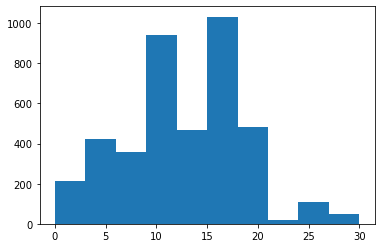



attr3_s float64
52.255908331343996% of data is nan. 4378 out of 8378
7.21125 +/- 1.4154502154184097


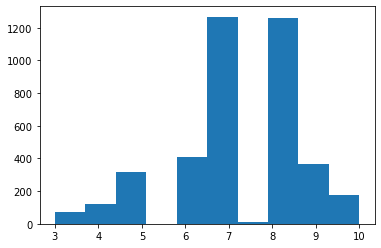



sinc3_s float64
52.255908331343996% of data is nan. 4378 out of 8378
8.082 +/- 1.4557406345907855


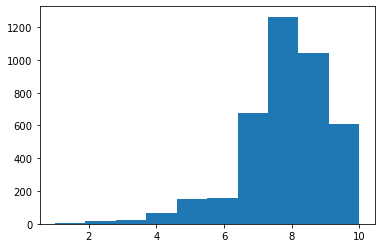



intel3_s float64
52.255908331343996% of data is nan. 4378 out of 8378
8.25775 +/- 1.179316596342392


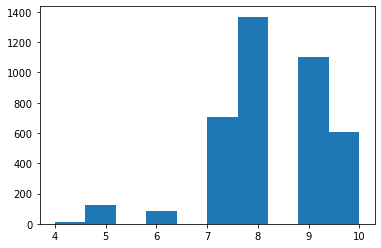



fun3_s float64
52.255908331343996% of data is nan. 4378 out of 8378
7.6925 +/- 1.626839082807627


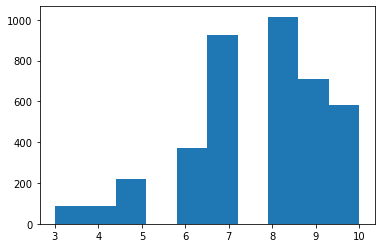

In [6]:
total = blindDateData.shape[0]
for col in columnList:
    colData = blindDateData[col]
    colData69 = blindDateDataWave69[col]
    colDataNot69 = blindDateDataWaveNot69[col]
    
    print(f'{col} {colData.dtype}')
    nanCount = sum([util.isNan(x) for x in colData])
    print(f'{100 * nanCount/total}% of data is nan. {nanCount} out of {total}')
    dataList = list(set(colData))
        
    if len(dataList)<=20:
        print(dataList)
    elif str(col) == 'met':
        print(colData.value_counts())
    else:
        if colData.dtype == "O":
            print(f"data varries across {len(dataList)} values")
        elif (("pf_o" in str(col)) or col.endswith("1_1") or col.endswith("4_1") or col.endswith("2_1")):
            question = col[-3:]
            if question not in pointDistributionList:
                pointDistributionList.append(question)
            print(f"{colData69.mean()} +/- {colData69.std()}")
            fig = plt.figure()
            plt.hist(colData69)
            plt.title('Waves 6 - 9')
            plt.show()
            print(f"{colDataNot69.mean()} +/- {colDataNot69.std()}")
            fig = plt.figure()
            plt.hist(colDataNot69)
            plt.title('Excluding Waves 6 - 9')
            plt.show()
        else:
            print(f"{colData.mean()} +/- {colData.std()}")
            fig = plt.figure()
            plt.hist(colData)
            plt.show()
    print("\n")

In [7]:
columnDataDictionary = {"columnList": columnList,
                        "nonBinaryCategoricalList": nonBinaryCategoricalList,
                        "stringToFloatList": stringToFloatList,
                        "pointDistributionList": pointDistributionList,
                        "partnerList": partnerList}

with open('../data/columnDataDictionary.json', 'w') as fp:
        json.dump(columnDataDictionary, fp)

In [8]:
interestColumns = ["sports","tvsports","exercise","dining","museums","art","hiking","gaming","clubbing","reading","tv","theater","movies","concerts","music","shopping","yoga"]
gender0 = blindDateData[blindDateData['gender'] == 0]
gender1 = blindDateData[blindDateData['gender'] == 1]

In [9]:
selectedIndecies = np.random.choice(gender0.shape[0],replace = False,size = (40))

In [10]:
recordedCorr = []
pearsonCorr = []
spearmanCorr = []
for i in selectedIndecies:
    candidate = gender0.iloc[[i]]
    partner = gender1[(gender1['iid'] == float(candidate['pid'])) & (gender1['pid'] == float(candidate['iid']))]
    candidateInterests = []
    partnerInterests = []
    for col in interestColumns:
        candidateScore = float(candidate[col])
        partnerScore = float(partner[col])
        if (util.isNan(candidateScore) == False and util.isNan(partnerScore) == False):
            candidateInterests.append(candidateScore)
            partnerInterests.append(partnerScore)
    if len(candidateInterests) >= 2:
        recordedCorr.append(candidate['int_corr'])
        pearsonValue = stats.pearsonr(np.array(candidateInterests),np.array(partnerInterests))[0]
        spearmanValue = stats.spearmanr(np.array(candidateInterests),np.array(partnerInterests))[0]
        pearsonCorr.append(pearsonValue)
        spearmanCorr.append(spearmanValue)

pearsonError = np.mean((np.array(pearsonCorr) - np.array(recordedCorr))/np.array(recordedCorr))
spearmanError = np.mean((np.array(spearmanCorr) - np.array(recordedCorr))/np.array(recordedCorr))
print(f'Pearson Error {pearsonError}')
print(f'Spearman Error {spearmanError}')

Pearson Error -0.24757387567507153
Spearman Error -0.28301711576144123


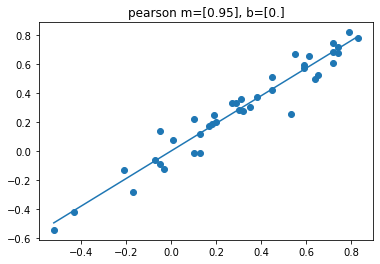

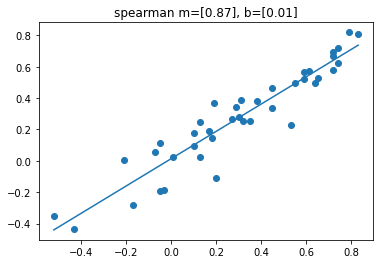

In [11]:
recordedArray = np.array(recordedCorr).reshape(-1,1)
pearsonArray = np.array(pearsonCorr).reshape(-1,1)
spearmanArray = np.array(spearmanCorr).reshape(-1,1)

util.plotCorrelation(recordedArray,pearsonArray,'pearson')
util.plotCorrelation(recordedArray,spearmanArray,'spearman')